In [1]:
with open('wikipedia_not_gendered_sentences.txt', 'r') as f:
    not_gendered = f.readlines()

In [2]:
len(not_gendered)

84409591

In [3]:
import sys
sys.path.append('tony-sun-intern-project/neutral_generation')
from is_gendered import is_gendered

In [4]:
is_gendered('he'), is_gendered('she'), is_gendered('he she'), is_gendered('poop')

('male', 'female', 'both', False)

In [12]:
both, nongendered = list(), list()

for sent in not_gendered:
    sent_type = is_gendered(sent)
    
    if sent_type == 'both':
        both.append(sent)
    elif not sent_type:
        nongendered.append(sent)

In [14]:
len(both), len(nongendered), len(both) + len(nongendered) == len(not_gendered)

(492211, 83917380, True)

In [15]:
with open('nongendered.txt', 'w') as f:
    for sent in nongendered:
        f.write(sent)

In [16]:
def tokenize_list(sentences):
    tokenized_list = list()
    
    for sent in sentences:
        tokenized = mt.tokenize(sent, return_str=True)
        tokenized_list.append(tokenized)
    
    return tokenized_list

In [18]:
from sacremoses import MosesTokenizer
mt = MosesTokenizer(lang='en')

In [19]:
nongendered_tokenized = tokenize_list(sentences=nongendered)

In [ ]:
with open('nongendered_tokenized.txt', 'w') as f:
    for sent in nongendered_tokenized:
        f.write(sent)

In [34]:
from collections import Counter, defaultdict
import re
import spacy
import matplotlib.pyplot as plt

In [22]:
# with open('wikipedia_training/original/wikipedia_gendered.source', 'r') as f:
#     source = f.readlines()

# with open('wikipedia_training/original/wikipedia_gendered.target', 'r') as f:
#     target = f.readlines()

In [24]:
with open('wikipedia_training/simple_augmentation/simple_augmentation.source', 'r') as f:
    source = f.readlines()

with open('wikipedia_training/simple_augmentation/simple_augmentation.target', 'r') as f:
    target = f.readlines()

In [25]:
len(source), len(target)

(30000000, 30000000)

In [26]:
def clean_str(word):
    pattern = re.compile("[^a-zA-Z']+", re.UNICODE)
    word = pattern.sub('', word)
    return word.lower()

In [30]:
%%time
change_type = Counter()
total_changes = 0

for source_sent, target_sent in zip(source, target):
    source_sent = source_sent.split(' ')
    target_sent = target_sent.split(' ')
    
    if len(source_sent) != len(target_sent):
        continue
        
    for i in range(len(source_sent)):
        if source_sent[i] != target_sent[i]:
            source_word = clean_str(source_sent[i])
            target_word = clean_str(target_sent[i])

            change_type[(source_word, target_word)] += 1
            
            total_changes += 1

CPU times: user 7min 23s, sys: 140 ms, total: 7min 23s
Wall time: 7min 23s


In [31]:
print(len(change_type))
change_type.most_common(20)

29573


[(('she', 'they'), 10802827),
 (('he', 'they'), 10802813),
 (('his', 'their'), 8400086),
 (('her', 'their'), 8400080),
 (('was', 'were'), 5286558),
 (('is', 'are'), 1448842),
 (('her', 'them'), 1385667),
 (('him', 'them'), 1087374),
 (('has', 'have'), 824500),
 (('his', 'theirs'), 361861),
 (('her', 'theirs'), 358830),
 (('himself', 'themself'), 340728),
 (('herself', 'themself'), 340724),
 (('his', 'them'), 298317),
 (('chairman', 'chair'), 120140),
 (('does', 'do'), 53786),
 (('his', 'her'), 53075),
 (("he's", "they're"), 40627),
 (("she's", "they're"), 40627),
 (('plays', 'play'), 33826)]

In [32]:
change_type_percent = Counter()
for change in change_type:
    change_type_percent[change] = '{:.3f}'.format(change_type[change] / total_changes)

In [33]:
change_type_percent.most_common(20)

[(('he', 'they'), '0.206'),
 (('she', 'they'), '0.206'),
 (('his', 'their'), '0.160'),
 (('her', 'their'), '0.160'),
 (('was', 'were'), '0.101'),
 (('is', 'are'), '0.028'),
 (('her', 'them'), '0.026'),
 (('him', 'them'), '0.021'),
 (('has', 'have'), '0.016'),
 (('his', 'theirs'), '0.007'),
 (('her', 'theirs'), '0.007'),
 (('his', 'them'), '0.006'),
 (('himself', 'themself'), '0.006'),
 (('herself', 'themself'), '0.006'),
 (('chairman', 'chair'), '0.002'),
 (('his', 'her'), '0.001'),
 (('plays', 'play'), '0.001'),
 (("he's", "they're"), '0.001'),
 (("she's", "they're"), '0.001'),
 (('holds', 'hold'), '0.001')]

In [35]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

In [36]:
labels = [change[0] for change in change_type.most_common(1000)]
sizes = [change[1] for change in change_type.most_common(1000)]

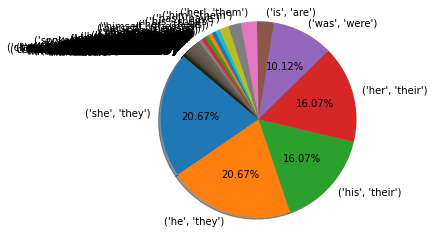

In [37]:
plt.pie(sizes, labels=labels,
autopct=my_autopct, shadow=True, startangle=140)

plt.axis('equal')
plt.show()